In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('data/survey-sim-agg (1).csv')
data.head()

,HASH,CLIENT_ID,SURVEY_WEEK,ADDRESS,EMAIL,POSITION,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
0,ebzz8,202256497,2024-07-08,pharmatrust host,qkueenkatherine@gmail.com,owner,Trade - Retail,1,0,0,0
1,ebzzg,554460332,2024-07-08,Nii Sentse,abdulbasitmohammed42@gmail.com,glass worker,Artisan,1,0,0,0
2,ecpbw,995382165,2024-07-08,Newyork Police station,cantona@gmai.cm,NaN,NaN,1,0,0,0
3,ebzxv,476871819,2024-07-08,Papase Justab,eraminanunyola@gmail.com,Beautician and cosmetics distributor,Beauty,1,0,0,0
4,ecrk1,689757138,2024-04-29,near akomade,NaN,Im a teacher,Education,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220615 entries, 0 to 220614
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HASH         214892 non-null  object
 1   CLIENT_ID    220615 non-null  int64 
 2   SURVEY_WEEK  220615 non-null  object
 3   ADDRESS      220434 non-null  object
 4   EMAIL        164070 non-null  object
 5   POSITION     204794 non-null  object
 6   INDUSTRY     204822 non-null  object
 7   DISBURSED    220615 non-null  int64 
 8   DR1          220615 non-null  int64 
 9   DEFAULTED    220615 non-null  int64 
 10  PTFRAUD      220615 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 18.5+ MB


In [4]:
data['SURVEY_WEEK'] = pd.to_datetime(data['SURVEY_WEEK'])
# data.head()

In [5]:
data.head()

,HASH,CLIENT_ID,SURVEY_WEEK,ADDRESS,EMAIL,POSITION,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
0,ebzz8,202256497,2024-07-08,pharmatrust host,qkueenkatherine@gmail.com,owner,Trade - Retail,1,0,0,0
1,ebzzg,554460332,2024-07-08,Nii Sentse,abdulbasitmohammed42@gmail.com,glass worker,Artisan,1,0,0,0
2,ecpbw,995382165,2024-07-08,Newyork Police station,cantona@gmai.cm,NaN,NaN,1,0,0,0
3,ebzxv,476871819,2024-07-08,Papase Justab,eraminanunyola@gmail.com,Beautician and cosmetics distributor,Beauty,1,0,0,0
4,ecrk1,689757138,2024-04-29,near akomade,NaN,Im a teacher,Education,1,1,0,1


In [6]:
df = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'EMAIL', 'INDUSTRY']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
df.head()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/1689020609.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'EMAIL', 'INDUSTRY']).agg(


,,,,,nsurveys,nloans,ndefaults,npfraud
HASH,SURVEY_WEEK,ADDRESS,EMAIL,INDUSTRY,,,,
6gg7r,2024-09-02,Abura Clinic,lolokoklu@yahoo.com,Legal,1,0,0,0
7ff38,2024-11-25,Apple st,samsonobour4@gmail.com,Education,1,0,0,0
7hfq5,2024-11-25,kpone katamanso,bulluchsandra794@gmail.com,Construction,1,0,0,0
7nj9g,2024-08-19,Dolphin street,agyarkobenard6@gmail.com,Trade - Retail,1,0,0,0
9mupb,2024-11-11,"16 Projector Street, Malik Estate Teshie",gloverfashiony@gmail.com,Healthcare,1,0,0,0


## Address Duplication vs DR

In [7]:
dup_address = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_address = dup_address[dup_address['nsurveys'] >= 2]
dup_address.head()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/3560324381.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_address = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS']).agg(


nsurveys  nloans  ndefaults  npfraud
HASH  SURVEY_WEEK ADDRESS                                                  
ebvuw 2024-06-17  Methodist church            2       1          1        1
ebvux 2024-05-13  Old Edobo Chip Zone         2       0          0        0
ebyeg 2024-05-27  Agona fie                   2       1          0        0
      2024-07-08  Agona Nkwanta               2       1          0        0
      2024-08-26  Agona Nkwanta               2       0          0        0

In [8]:
dup_address['nsurveys'].min()

np.int64(2)

In [9]:
dup_address['dr'] = dup_address['ndefaults']/dup_address['nloans']
dup_address['fr'] = dup_address['npfraud']/dup_address['nloans']

In [10]:
import matplotlib.pyplot as plt

Distribution of default rates  for duplicated addresses

[]

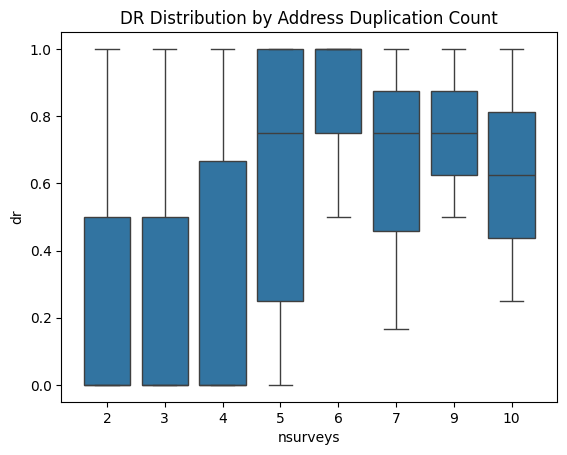

In [11]:
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_address)
plt.title('DR Distribution by Address Duplication Count')
plt.plot()

In [12]:
highdr = dup_address[(dup_address['nsurveys'] >= 4) & (dup_address['nloans'] >= 3)]
highdr.head()

,,,nsurveys,nloans,ndefaults,npfraud,dr,fr
HASH,SURVEY_WEEK,ADDRESS,,,,,,
ebysp,2024-11-11,Near main market,9,5,5,5,1.0,1.00
ebzj4,2024-06-17,University of Cape Coast,4,3,0,0,0.0,0.00
ebzj5,2024-08-19,Twifo Praso Road,9,4,2,1,0.5,0.25
ebzz9,2024-09-16,Mallam Junction,5,5,1,0,0.2,0.00
ebzzb,2024-11-04,Amist Hotel,10,8,8,6,1.0,0.75


[]

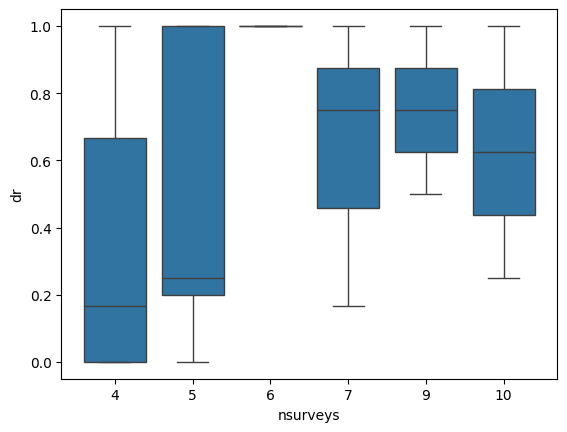

In [13]:
sns.boxplot(x= 'nsurveys', y= 'dr', data = highdr)
plt.plot()

In [14]:
highdr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29 entries, ('ebysp', Timestamp('2024-11-11 00:00:00'), 'Near main market') to ('s126f', Timestamp('2024-09-02 00:00:00'), 'Pentecost Church')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nsurveys   29 non-null     int64  
 1   nloans     29 non-null     int64  
 2   ndefaults  29 non-null     int64  
 3   npfraud    29 non-null     int64  
 4   dr         29 non-null     float64
 5   fr         29 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.4+ MB


Summary DR of DupSurveys

In [15]:
summary = dup_address.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/1556822430.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_address.groupby(['nsurveys']).agg(


,nloans,ndefaults,dr1
nsurveys,,,
2,2349,623,0.265219
3,299,93,0.311037
4,61,20,0.327869
5,41,20,0.487805
6,8,7,0.875000
7,13,7,0.538462
9,9,7,0.777778
10,12,9,0.750000


In [16]:
summary = summary.reset_index()

In [17]:
summary.head(10)

,nsurveys,nloans,ndefaults,dr1
0,2,2349,623,0.265219
1,3,299,93,0.311037
2,4,61,20,0.327869
3,5,41,20,0.487805
4,6,8,7,0.875000
5,7,13,7,0.538462
6,9,9,7,0.777778
7,10,12,9,0.750000


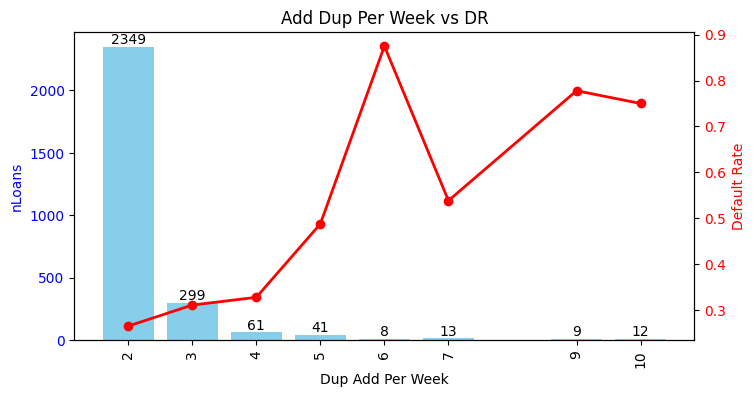

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('Dup Add Per Week')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('Add Dup Per Week vs DR')
plt.show()

Duplicate Address + Email vs DR

In [19]:
dup_add_email = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'EMAIL']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_email['dr'] = dup_add_email['ndefaults']/dup_add_email['nloans']
dup_add_email['fr'] = dup_add_email['npfraud']/dup_add_email['nloans']
dup_add_email = dup_add_email[dup_add_email['nsurveys'] >= 2]
dup_add_email.head()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/168112091.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_email = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'EMAIL']).agg(


nsurveys  \
HASH  SURVEY_WEEK ADDRESS              EMAIL                                  
ebyez 2024-09-23  Fox fm               michaelbamfo2017@gmail.com         2   
ebysp 2024-07-29  Alfalfa street       Oliviamanu78@gmail.com             2   
      2024-10-28  Near main market     mandyhollands98@gmail.com          2   
      2024-11-11  Near main market     francisobeng92@gmail.com           2   
ebyu1 2024-05-20  Lower Pra rural bank danieleshungbc20@gmail.com         2   

                                                                   nloans  \
HASH  SURVEY_WEEK ADDRESS              EMAIL                                
ebyez 2024-09-23  Fox fm               michaelbamfo2017@gmail.com       2   
ebysp 2024-07-29  Alfalfa street       Oliviamanu78@gmail.com           2   
      2024-10-28  Near main market     mandyhollands98@gmail.com        2   
      2024-11-11  Near main market     francisobeng92@gmail.com         0   
ebyu1 2024-05-20  Lower Pra rural bank danieleshungbc20@gmail.com       1   

                                                                   ndefaults  \
HASH  SURVEY_WEEK ADDRESS              EMAIL                                   
ebyez 2024-09-23  Fox fm               michaelbamfo2017@gmail.com          0   
ebysp 2024-07-29  Alfalfa street       Oliviamanu78@gmail.com              0   
      2024-10-28  Near main market     mandyhollands98@gmail.com           2   
      2024-11-11  Near main market     francisobeng92@gmail.com            0   
ebyu1 2024-05-20  Lower Pra rural bank danieleshungbc20@gmail.com          1   

                                                                   npfraud  \
HASH  SURVEY_WEEK ADDRESS              EMAIL                                 
ebyez 2024-09-23  Fox fm               michaelbamfo2017@gmail.com        0   
ebysp 2024-07-29  Alfalfa street       Oliviamanu78@gmail.com            0   
      2024-10-28  Near main market     mandyhollands98@gmail.com         2   
      2024-11-11  Near main market     francisobeng92@gmail.com          0   
ebyu1 2024-05-20  Lower Pra rural bank danieleshungbc20@gmail.com        1   

                                                                    dr   fr  
HASH  SURVEY_WEEK ADDRESS              EMAIL                                 
ebyez 2024-09-23  Fox fm               michaelbamfo2017@gmail.com  0.0  0.0  
ebysp 2024-07-29  Alfalfa street       Oliviamanu78@gmail.com      0.0  0.0  
      2024-10-28  Near main market     mandyhollands98@gmail.com   1.0  1.0  
      2024-11-11  Near main market     francisobeng92@gmail.com    NaN  NaN  
ebyu1 2024-05-20  Lower Pra rural bank danieleshungbc20@gmail.com  1.0  1.0

[]

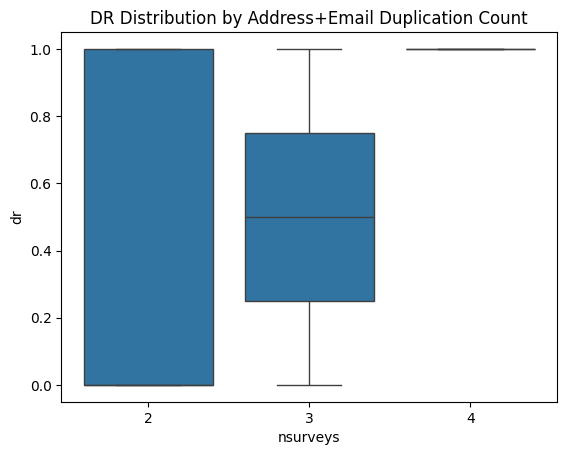

In [20]:
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_email)
plt.title('DR Distribution by Address+Email Duplication Count')
plt.plot()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/1006304842.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'INDUSTRY']).agg(


[]

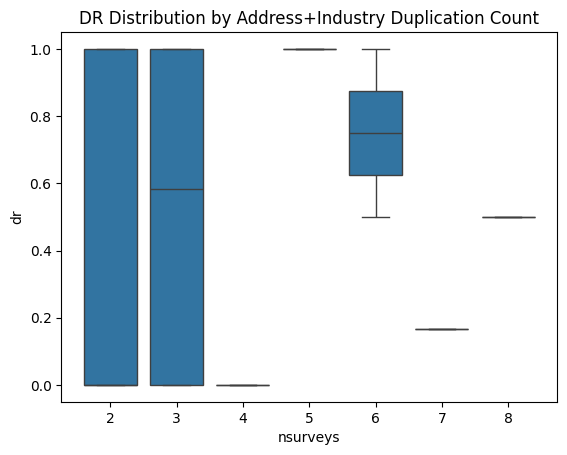

In [21]:
dup_add_ind = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'INDUSTRY']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/648949601.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_ind = data.groupby(['HASH', 'SURVEY_WEEK', 'INDUSTRY']).agg(


[]

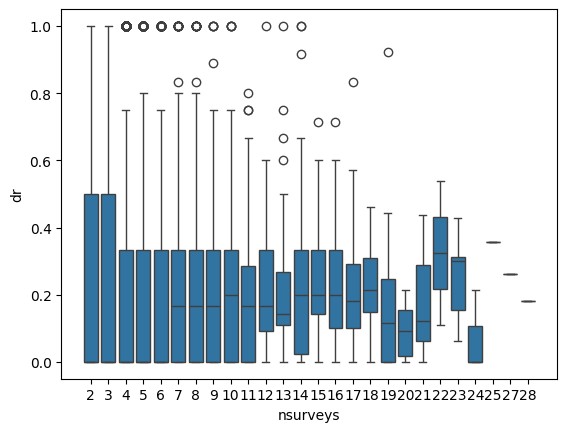

In [22]:
dup_ind = data.groupby(['HASH', 'SURVEY_WEEK', 'INDUSTRY']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_ind = dup_ind[dup_ind['nsurveys'] >= 2]
dup_ind['dr'] = dup_ind['ndefaults']/dup_ind['nloans']
dup_ind['fr'] = dup_ind['npfraud']/dup_ind['nloans']
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_ind)
plt.plot()

In [23]:
data['POSITION'] = data['POSITION'].str.lower()

In [24]:
data.head(2)

,HASH,CLIENT_ID,SURVEY_WEEK,ADDRESS,EMAIL,POSITION,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
0,ebzz8,202256497,2024-07-08,pharmatrust host,qkueenkatherine@gmail.com,owner,Trade - Retail,1,0,0,0
1,ebzzg,554460332,2024-07-08,Nii Sentse,abdulbasitmohammed42@gmail.com,glass worker,Artisan,1,0,0,0


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/1951295213.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_pos = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'POSITION']).agg(


[]

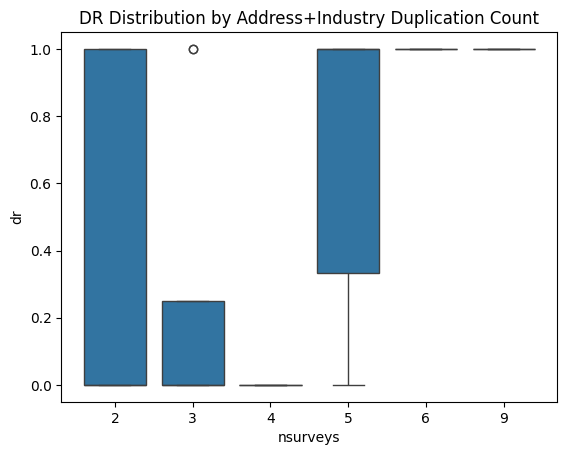

In [26]:
dup_add_pos = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'POSITION']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()

In [27]:
summary = dup_add_pos.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/2953725484.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_pos.groupby(['nsurveys']).agg(


,nloans,ndefaults,dr1
nsurveys,,,
1,87145,16934,0.194320
2,296,117,0.395270
3,14,2,0.142857
4,1,0,0.000000
5,15,9,0.600000
6,4,4,1.000000
9,8,8,1.000000


In [28]:
summary = summary.reset_index()

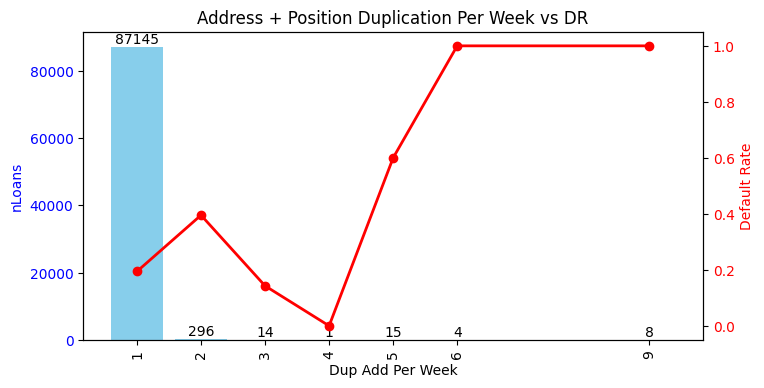

In [30]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('Dup Add Per Week')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('Address + Position Duplication Per Week vs DR')
plt.show()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/4260814959.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add = data.groupby(['SURVEY_WEEK', 'ADDRESS']).agg(


[]

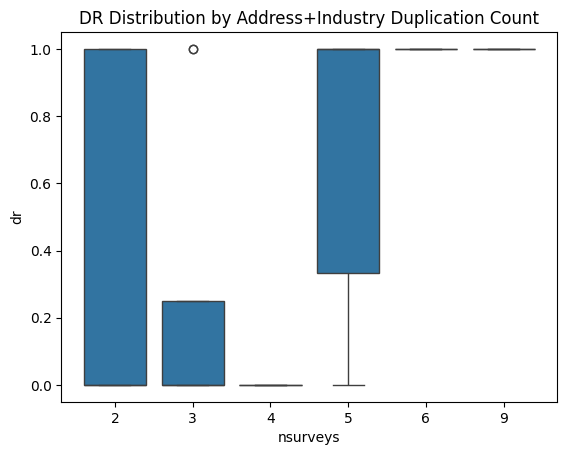

In [37]:
dup_add = data.groupby(['SURVEY_WEEK', 'ADDRESS']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()

In [38]:
summary = dup_add.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98728/2703242245.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add.groupby(['nsurveys']).agg(


,nloans,ndefaults,dr1
nsurveys,,,
1,83917,16014,0.190831
2,4969,1150,0.231435
3,1313,295,0.224676
4,506,104,0.205534
5,327,85,0.259939
6,220,60,0.272727
7,173,48,0.277457
8,80,20,0.250000
9,97,25,0.257732


In [40]:
summary = summary.reset_index()

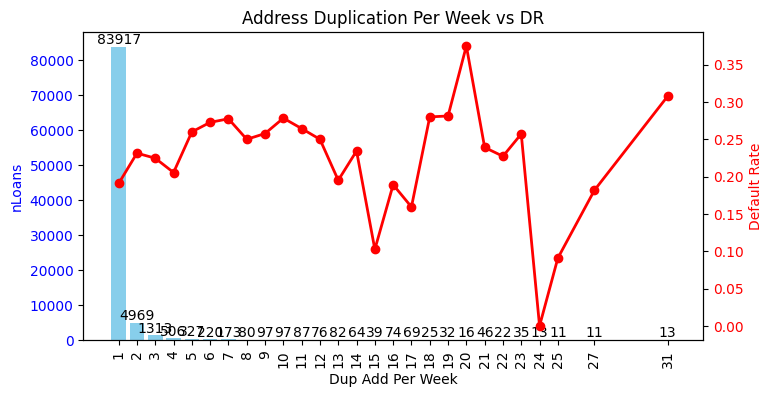

In [42]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('Dup Add Per Week')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('Address Duplication Per Week vs DR')
plt.show()